# ANSWERS -- Intro to `xarray`

## Part 1

### `xarray` Data Structures

### Question 1

In [2]:
#Import the library
import xarray as xr

1. We are going to be working with the [NOAA OISST](https://psl.noaa.gov/data/gridded/data.noaa.oisst.v2.highres.html) sea surface data again from the lesson. Write the relative filepath for the data  and use the `open_dataset()` method to access the file.

In [3]:
# ANSWER Q1.1
ds_sst = xr.open_dataset('./Data_Images/oisst-avhrr-v02r01.20220304.nc')
ds_sst

<xarray.Dataset> Size: 17MB
Dimensions:  (time: 1, zlev: 1, lat: 720, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 8B 2022-03-04T12:00:00
  * zlev     (zlev) float32 4B 0.0
  * lat      (lat) float32 3kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 6kB 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
Data variables:
    sst      (time, zlev, lat, lon) float32 4MB ...
    anom     (time, zlev, lat, lon) float32 4MB ...
    err      (time, zlev, lat, lon) float32 4MB ...
    ice      (time, zlev, lat, lon) float32 4MB ...
Attributes: (12/37)
    Conventions:                CF-1.6, ACDD-1.3
    title:                      NOAA/NCEI 1/4 Degree Daily Optimum Interpolat...
    references:                 Reynolds, et al.(2007) Daily High-Resolution-...
    source:                     ICOADS, NCEP_GTS, GSFC_ICE, NCEP_ICE, Pathfin...
    id:                         oisst-avhrr-v02r01.20220304.nc
    naming_authority:           gov.noaa.ncei
    ...                         ...
    time_coverage_start:        2022-03-04T00:00:00Z
    time_coverage_end:          2022-03-04T23:59:59Z
    metadata_link:              https://doi.org/10.25921/RE9P-PT57
    ncei_template_version:      NCEI_NetCDF_Grid_Template_v2.0
    comment:                    Data was converted from NetCDF-3 to NetCDF-4 ...
    sensor:                     Thermometer, AVHRR

2. Answer the following from the output.
- What is the first and last values for latitude?
- What is the "institution" listed in the metadata?
- What date was this data taken?
- How many latitude values are there? How many longitude values?

ANSWER Q1.2 
1. -88.99 and 88.99
2.  NOAA
3.  March 4th, 2022 at 12:00pm
4.  lat = 720, lon = 1440

3. Display just the `ice` data variable

In [4]:
# ANSWER Q1.3
#Option 1
ds_sst.ice
#Option 2
ds_sst['ice']

<xarray.DataArray 'ice' (time: 1, zlev: 1, lat: 720, lon: 1440)> Size: 4MB
[1036800 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 8B 2022-03-04T12:00:00
  * zlev     (zlev) float32 4B 0.0
  * lat      (lat) float32 3kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 6kB 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
Attributes:
    long_name:  Sea ice concentration
    units:      %
    valid_min:  0
    valid_max:  100

4. Select only the SST data between 30-48 North and 3-30 East

In [5]:
# ANSWER Q1.4
ds_sst['sst'].sel(lat=slice(30, 48), lon=slice(3, 30))

5. Use the `.plot()` method to view the subset of data you found in the previous question.

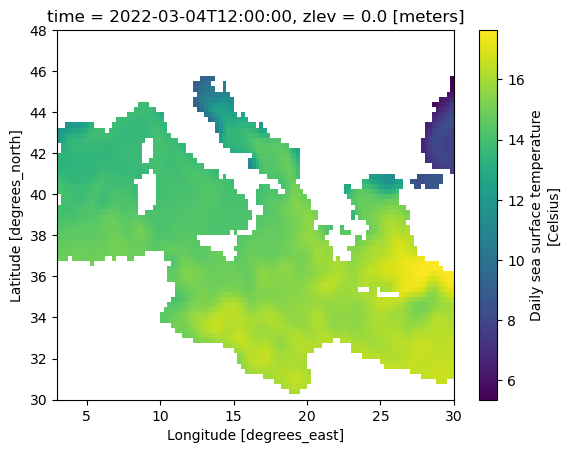

In [7]:
# ANSWER Q1.5
ds_sst['sst'].sel(lat=slice(30, 48), lon=slice(3, 30)).plot()

### Question 2
Use the fake data below for the follow 2 parts.

In [47]:
import numpy as np

In [48]:
ndvi_values = np.random.rand(4, 5, 6)

time = ['2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01']
latitude  = [34.3, 34.4, 34.5, 34.6, 34.7]
longitude = [-118.3, -118.2, -118.1, -118.0, -117.9, -117.8]


**1.** Make a DataArray out of the input values and dimensions above. The array should hold NDVI values (NDVI is a remote sensing calculation for the density of green stuff over an area). Be sure to specify both dimensions and coordinates. Describe in words what we know about the dimensions and location of the data.

In [52]:
#ANSWER Q2.1
da_ndvi = xr.DataArray(
    data = ndvi_values, 
    dims = ['time', 'lat', 'lon'], 
    coords = [time, latitude, longitude])
#da_ndvi

ANSWER Q2.1 -

**2.** Write a line of code to select the 1st date from the `ndvi` data array.

In [56]:
# ANSWER Q2.2
#ndvi.isel(time=0)

**3.** Write a line of code to select the date `2022-03-01` from the `ndvi` data array.

In [ ]:
# ANSWER Q2.3
#ndvi.sel(time = '2022-03-01')

**4.** Create the array again, but this time don't specify coordinates. What is different about the DataArray? Describe in words what we know about this data.

In [55]:
# ANSWER Q2.4
da_ndvi_nocoor = xr. DataArray(
    data = ndvi_values, 
    dims = ['time','lat','lon'])
#da_ndvi_nocoor

ANSWER Q2.4 -

**5.** Create the array again, but this time don't specify dimensions. How does that compare to Part B? Describe in words what we know about this data.

In [54]:
# ANSWER Q2.5
da_ndvi_empty = xr. DataArray(
    data = ndvi_values)
#da_ndvi_empty

ANSWER Q2.5 -

## Question 3

We are going to add another variable, dimension, and coordinate to the fake data we created above. Let's go through the process of creating it again, but this time, with another variable -- flower.

In [57]:
# Imports libraries
import numpy as np
import xarray as xr

In [58]:
#Creates some random arrays of data values
ndvi_values = np.random.rand(4, 3, 5, 6)
flower_values = np.random.rand(4, 3, 5, 6)

In [59]:
# Dims and Coords data we created.
date = ['2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01']
time = ['08:00', '12:00', '16:00']
latitude  = [34.3, 34.4, 34.5, 34.6, 34.7]
longitude = [-118.3, -118.2, -118.1, -118.0, -117.9, -117.8]

1. Make two DataArrays -- one for NDVI and one for Flower -- out of the input values and dimensions above.

In [60]:
# ANSWER Q3.1
#Creates arrays out of the data above
ndvi = xr.DataArray(
    ndvi_values, 
    dims = ['date','time', 'latitude', 'longitude'],
    coords=[date, time, latitude, longitude]
    )
flower = xr.DataArray(
    flower_values,
    dims = ['date','time', 'latitude', 'longitude'],
    coords=[date, time, latitude, longitude]
    )

2. Create a Dataset out of the two DataArrays.

In [61]:
# ANSWER Q3.2
ds = xr.Dataset(
    {'ndvi': ndvi, 'flower': flower})
#ds

3. View March data from 8:00am at latitude 34.5 and longitude -118.2. What do you see?

In [62]:
#ANSWER Q3.3
#ds.sel(date='2022-03-01', time = '08:00', latitude=34.5, longitude=-118.2)

ANSWER Q3.3 - This answer allows us to view all the variable values at one specific point. The output array is ().

4. View only the data at latitude 34.5 and longitude -118.2. What do you see? 

In [63]:
# ANSWER Q3.4
#ds.sel(latitude = 34.5, longitude=-118.2)

ANSWER Q3.4 - The output is an array of values at each date and time. The output array is (4,3)

5. Plot the NDVI array of the dataset. What do you see?

In [64]:
# ANSWER Q3.5
#ds.ndvi.plot()

ANSWER Q3.5 - You see a very unhelpful and unuseful plot. Let's examine further.

6. Specify column and row variables. What do you see? (Hint: Look at the end of the lesson for some guidance.)

In [65]:
# ANSWER Q3.6
#ds.ndvi.plot(x='longitude', y = 'latitude', col='time', row = 'date')

ANSWER Q3.6 - We see an array of plots. 

# Part 2

## Question 4
We are going to open our NOAA OISST sea surface temperature data again. Input the correct relative filepath below to open it. (You should have it save on your Cyrocloud by this point.)

In [66]:
ds_sst = xr.open_dataset('./Data_Images/oisst-avhrr-v02r01.20220304.nc')

**1.** Select just the sst values from 10 to 25 degrees North and 50 to 88 degrees West.

:::{admonition} Hint
:class: note, dropdown

Watch the units on longitude. What are the min and max values of the longitude coordinate array?

:::

In [74]:
# ANSWER 4.1
ds_sst.sel(lat = slice(10,25), lon = slice(272, 310)).sst

<xarray.DataArray 'sst' (time: 1, zlev: 1, lat: 60, lon: 152)> Size: 36kB
[9120 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 8B 2022-03-04T12:00:00
  * zlev     (zlev) float32 4B 0.0
  * lat      (lat) float32 240B 10.12 10.38 10.62 10.88 ... 24.38 24.62 24.88
  * lon      (lon) float32 608B 272.1 272.4 272.6 272.9 ... 309.4 309.6 309.9
Attributes:
    long_name:  Daily sea surface temperature
    units:      Celsius
    valid_min:  -300
    valid_max:  4500

ANSWER Q4.1 - Longitudinal coordinates are given on a scale of -180-180, or 0-360 degrees. You had to convert the degrees West in order to view the correct part of the data. 

If you don't have a strong earth science background and/or are confused on this longitudinal conversion, come talk to me!

Another way to solve this -- if you are an overachiever -- would be to write a function to convert the values. 

In [70]:
# A slightly overcomplicated but still fun way to do it:
        #Write a function to convert longitude from -180 -> 180 to 0 -> 360
# Subtract 180 from 360 degree longitude to convert to -180/180 longitude
def convert_lon(lon_180):
    '''Convert a longitude from 0 to 360 degree range to a -180 to 180 degree range'''
    if lon_180 < 0:
        lon_360 = lon_180 + 360
    else:
        lon_360 = lon_180
    return lon_360

# from 272 to 310
#ds_sst.sel(lat=slice(10, 25), lon=slice(convert_lon(-88), convert_lon(-50)))

**2.** Use the `.plot()` function to look at the data in your subset.

:::{admonition} Hint
:class: note, dropdown

Watch your data structure. Recall that `.plot()` works on a DataArray, not a Dataset.

:::

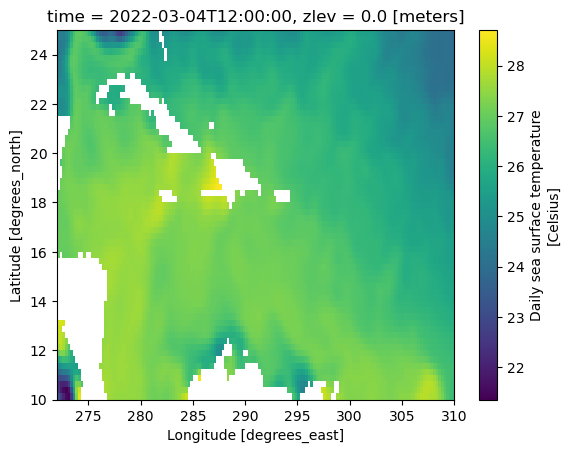

In [72]:
# ANSWER Q4.2
ds_sst.sel(lat = slice(10,25), lon = slice(272, 310)).sst.plot()

### Question 5

How many dimensions should your output array have if you did each of the following:
1. selected the 1st time value
1. selected the 1st time value and the 100th to the 200th latitude values
1. selected the 100th to the 200th latitude values and the 1000th to 1200th longitude values
1. selected the 1st time value, the 1st elevation value, the 100th to the 200th latitude values and the 1000th to 1200th longitude values
1. selected the 1st time value, 1st elevation value, the 1st latitude value and the 1st longitude value

ANSWERS Q5
1. 3 dimensions (lat, lon, zlev)
2. 3 dimensions (lat, lon, zlev)
3. 4 dimensions (time, lat, lon, zlev)
4. 2 dimensions (lat, lon)
5. 0 dimensions (one value)

CONGRATS if you made it this far! Ask me for the answers if you get here before class ends. And help those around you!

If you are curious about more things with xarray, start to explore the material on the SARP website, or check out [xarray.dev](https://tutorial.xarray.dev/overview/get-started.html)